# Performing Analysis of Meteorological Data

 Historical data on many meteorological parameters such as pressure, temperature, humidity, rain, etc...

One type of data that’s easier to find on the net is Weather data. Many sites provide historical data on many meteorological parameters such as pressure, temperature, humidity,  wind_speed, visibility, etc. Our SuvenML team has downloaded one such weather dataset from kaggle. (Source URL: https://www.kaggle.com/muthuj7/weather-dataset) 

The dataset has hourly temperature recorded for last 10 years starting from 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200. It corresponds to Finland, a country in
the Northern Europe. You can download the dataset from this Google drive link:
https://drive.google.com/open?id=1ScF_1a-bkHi1qe8Rn78uxK6_5QwUD9Bu

<h1><center>Hypothesis</center></h1>

**The Null Hypothes is H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"**

<p>The H0 means we need to find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for
the same period have increased or not. This monthly analysis has to be done for all 12 months over the 10 year period. So you are basically resampling your data from hourly
to monthly, then comparing the same month over the 10 year period. Support your analysis by appropriate visualizations using matplotlib and / or seaborn library.</p>

Importing useful module to Analysis Weather data and visualizations data

## import module 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imlib as imd

Before pandas read_csv file to read dataset ensure that dataset is downlorded. If not downlord then Go to https://drive.google.com/open?id=1ScF_1a-bkHi1qe8Rn78uxK6_5QwUD9Bu link and downlord it.

In [2]:
# Weather history data read
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


How mush rows and cols are in weatherHistory dataset

In [3]:
# shape of our data
df.shape

(96453, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [5]:
list_columns = df.columns
list_columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

## Analysis Statastic Summary

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


How feature realted each. The co-relation of our datase feature co-reation value

In [7]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


<AxesSubplot:>

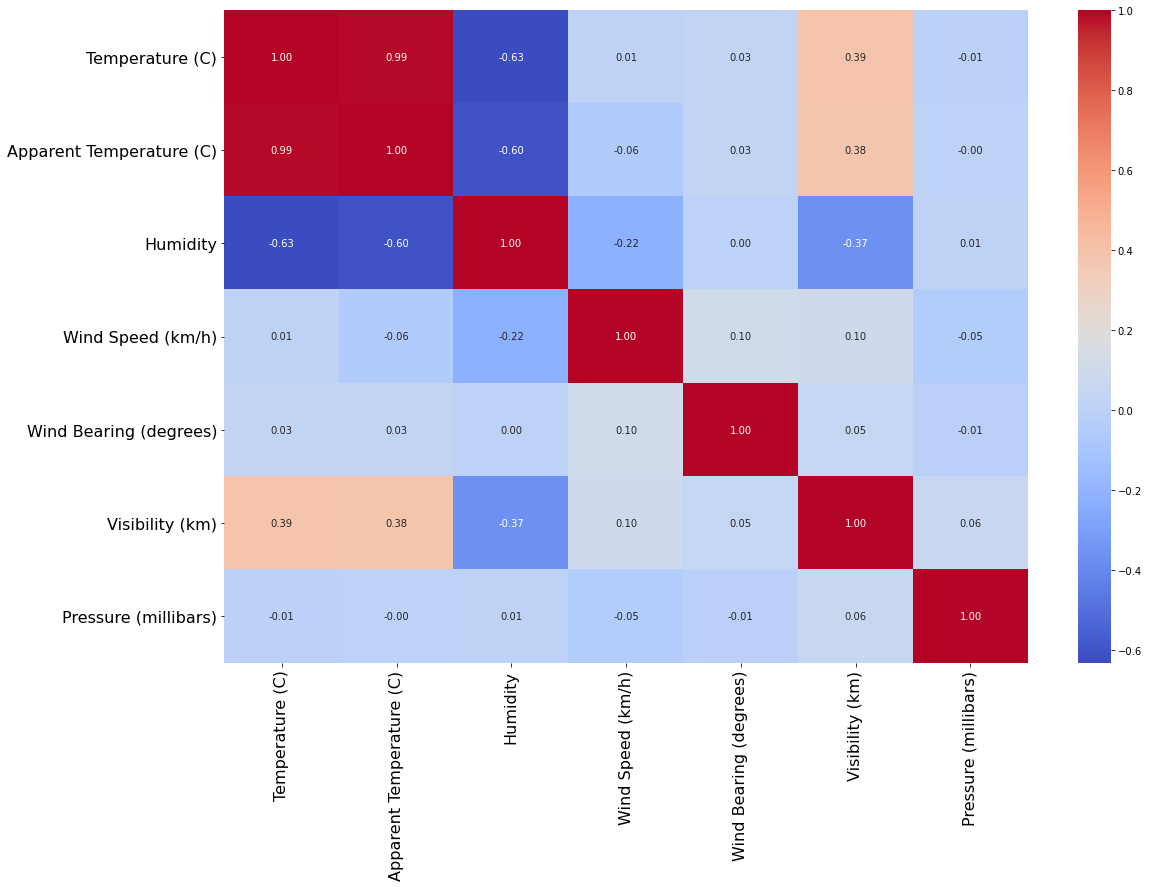

In [8]:
plt.figure(figsize=(18, 12))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

Above visualization we can obseve it how co realted each feature with each other.

# Data Cleaning

## Missing value

Cheack our dataset missing value or not is missing value avalible then replace or fillna function we can using mean, mode of that column we can replace missing place.

In [9]:
# cheack misssing value
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

There is Missing value avalible

In [10]:
# Missing value fill with its mode

df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])

In [11]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [13]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Date convert as per dataframe understand language so we can analysis data as per date formate

In [14]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace= True)

In [15]:
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

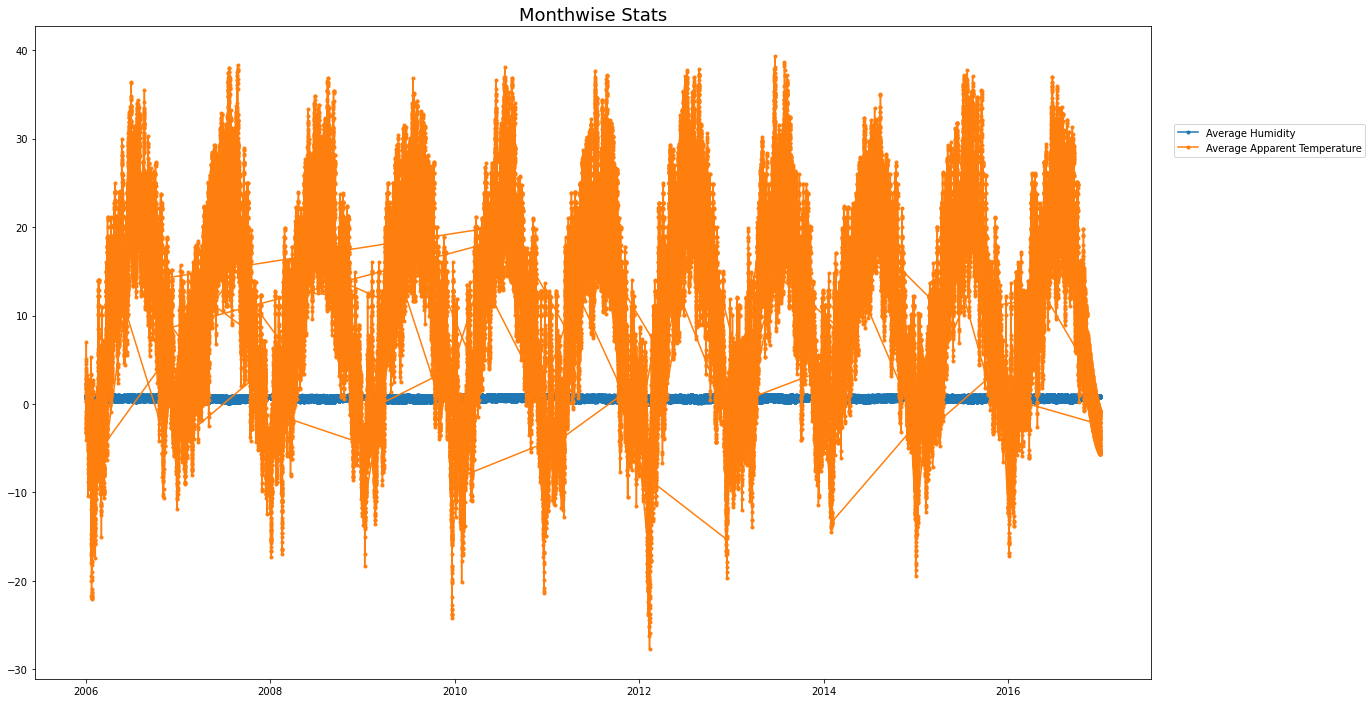

In [16]:
plt.figure(figsize=(20, 12))
hdt=df['Humidity']
atm=df['Apparent Temperature (C)']
plt.title("Monthwise Stats", fontsize=18)
plt.plot(hdt,label="Average Humidity", marker=".")
plt.plot(atm,label="Average Apparent Temperature",marker='.')
plt.legend(loc=(1.02, 0.8))
plt.show()

Apparent Temperature and Humidity with time data resampling

In [17]:
df1 = df[['Apparent Temperature (C)', 'Humidity']] 
df2 = df1.resample('M').mean()

In [18]:
df1.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


In [19]:
df2.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


Plotting the variation in Apparent Temperature and Humidity with time

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

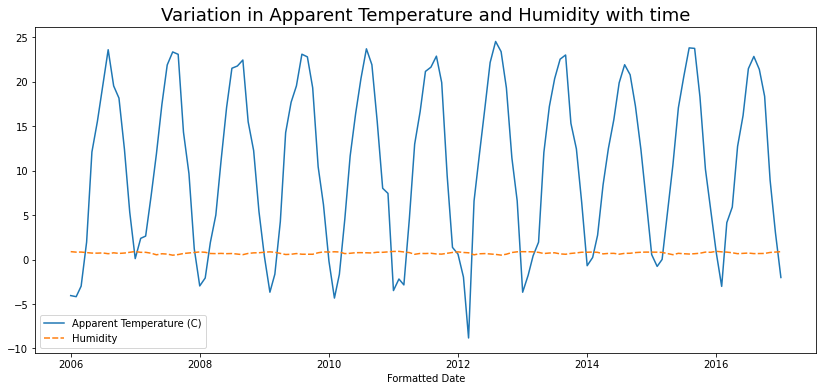

In [20]:

plt.figure (figsize=(14,6))

plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df2)

Variation in Apparent Temperature and Humidity with time How the temperature go down and Hymidity go down. How Apparent Temperature and Humidity related each other.

Retrieving the data of a particular month from every year

## Januaray

In January month how Apparent Temperature and Humidity how go and related each other.

In [21]:
# In 1th month

df_jan = df2[df2.index.month==1] 
print (df_jan) 
df_jan.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-01-31 00:00:00+00:00                 -4.173708  0.834610
2007-01-31 00:00:00+00:00                  2.387015  0.813495
2008-01-31 00:00:00+00:00                 -2.069907  0.819476
2009-01-31 00:00:00+00:00                 -3.669937  0.867621
2010-01-31 00:00:00+00:00                 -4.329062  0.875914
2011-01-31 00:00:00+00:00                 -2.186813  0.922030
2012-01-31 00:00:00+00:00                 -1.965211  0.797581
2013-01-31 00:00:00+00:00                 -1.768578  0.883105
2014-01-31 00:00:00+00:00                  0.234536  0.846169
2015-01-31 00:00:00+00:00                 -0.770124  0.831519
2016-01-31 00:00:00+00:00                 -3.014576  0.866156


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

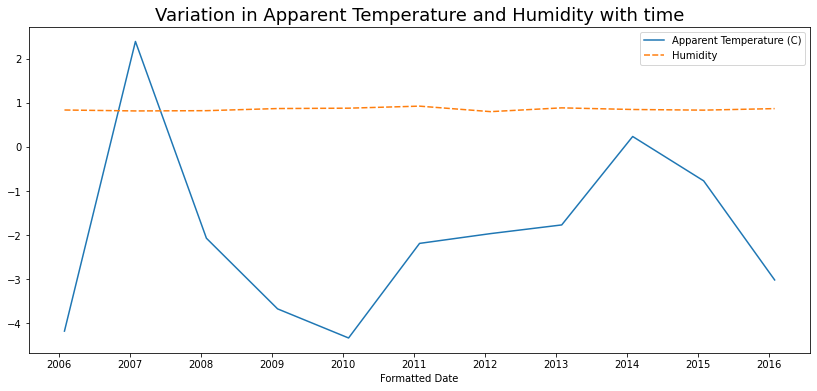

In [22]:
plt.figure (figsize=(14,6))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_jan)

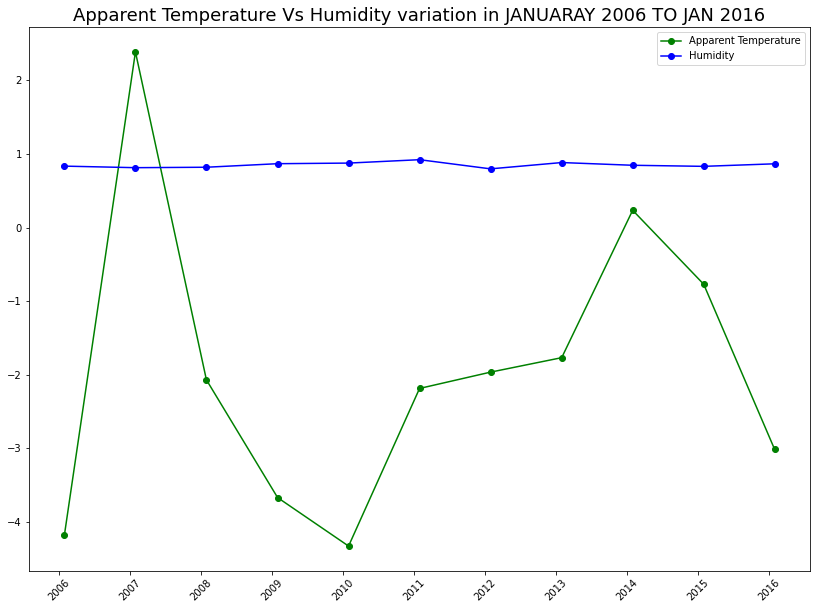

In [23]:
# Januaray
plt.figure(figsize=(14, 10))
plt.plot(df_jan.loc['2006-01-31':'2016-01-31','Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_jan.loc['2006-01-31':'2016-01-31','Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in JANUARAY 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

In above graph Apparent Temperature Vs Humidity How to go bothe increashing, or both decreshing or both oposite in 2006 to 2016 year.

Januray month Wind spped with humidity with time data resampling

In [24]:
df_Jw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Jwi = df_Jw.resample('M').mean()

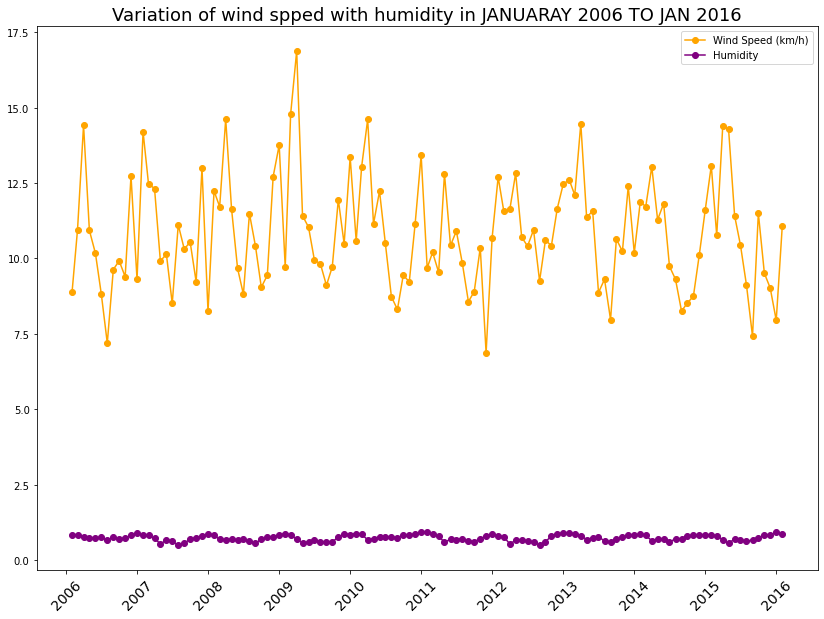

In [25]:

plt.figure(figsize=(14, 10))
plt.plot(df_Jwi.loc['2006-01-31':'2016-01-31', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Jwi.loc['2006-01-31':'2016-01-31', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in JANUARAY 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## February

In February how Apparent Temperature and Humidity how go and related each other.

In [26]:
# In 2nd month

df_fab = df2[df2.index.month==2] 
print (df_fab) 
df.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-02-28 00:00:00+00:00                 -2.990716  0.843467
2007-02-28 00:00:00+00:00                  2.639848  0.815015
2008-02-29 00:00:00+00:00                  1.915597  0.682615
2009-02-28 00:00:00+00:00                 -1.641237  0.821161
2010-02-28 00:00:00+00:00                 -1.662045  0.851682
2011-02-28 00:00:00+00:00                 -2.849471  0.854137
2012-02-29 00:00:00+00:00                 -8.817241  0.762859
2013-02-28 00:00:00+00:00                  0.418171  0.869345
2014-02-28 00:00:00+00:00                  2.742998  0.812530
2015-02-28 00:00:00+00:00                  0.017006  0.803452
2016-02-29 00:00:00+00:00                  4.150782  0.836853


Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

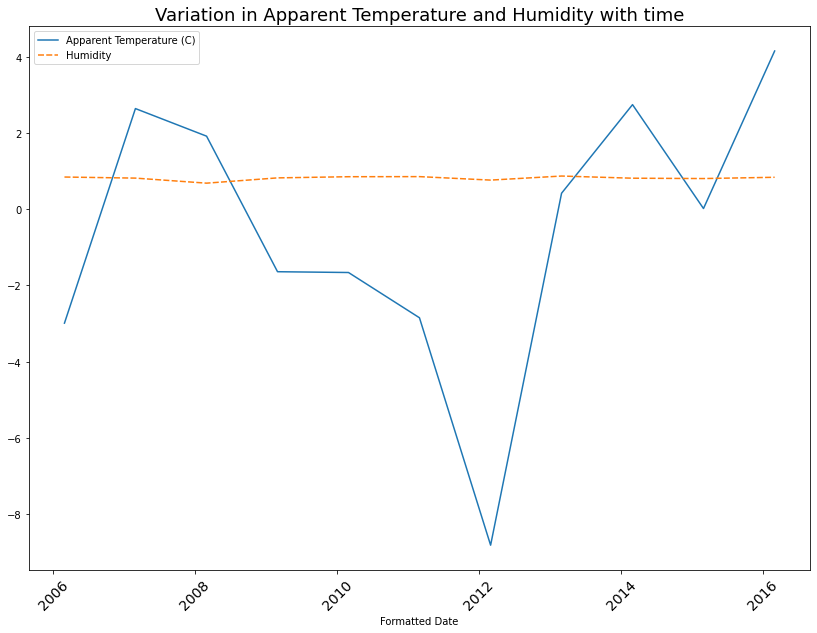

In [27]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_fab)
plt.xticks(rotation=45, fontsize=14)

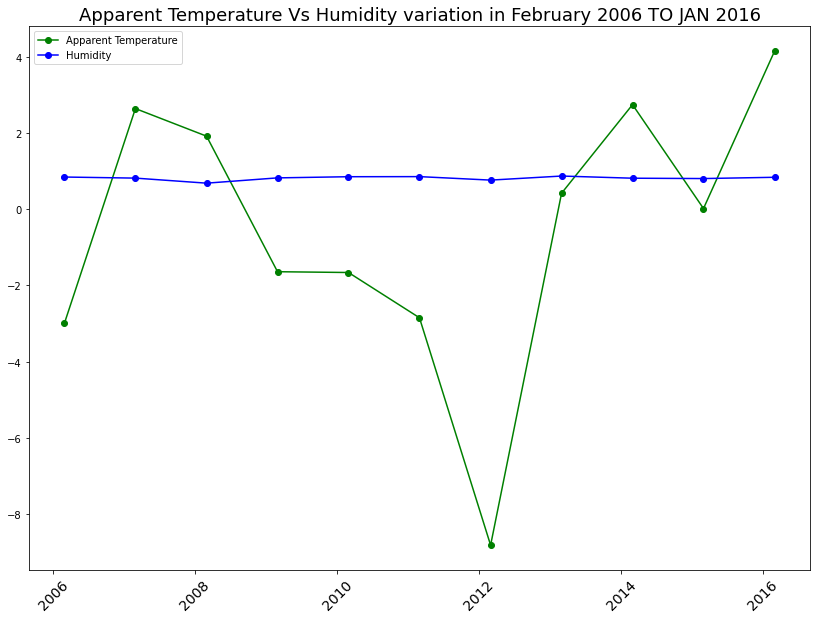

In [28]:
plt.figure(figsize=(14, 10))
plt.plot(df_fab.loc['2006-02-28':'2016-02-29', 'Apparent Temperature (C)'],
        marker='o', label="Apparent Temperature", linestyle='-', color="green")
plt.plot(df_fab.loc['2006-02-28':'2016-02-29', 'Humidity'], marker='o',
        linestyle='-', label="Humidity", color="blue")
plt.title("Apparent Temperature Vs Humidity variation in February 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

In above graph Apparent Temperature Vs Humidity How to go bothe increashing, or both decreshing or both oposite in 2006 to 2016 year.

February month Wind spped with humidity with time data resampling

In [29]:
df_fw = df[['Wind Speed (km/h)', 'Humidity']] 
df_fwi = df_fw.resample('M').mean()
df_fwi.head()

,Wind Speed (km/h),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,17.114300,0.890000
2006-01-31 00:00:00+00:00,8.894211,0.834610
2006-02-28 00:00:00+00:00,10.957008,0.843467
2006-03-31 00:00:00+00:00,14.421488,0.778737
2006-04-30 00:00:00+00:00,10.930670,0.728625


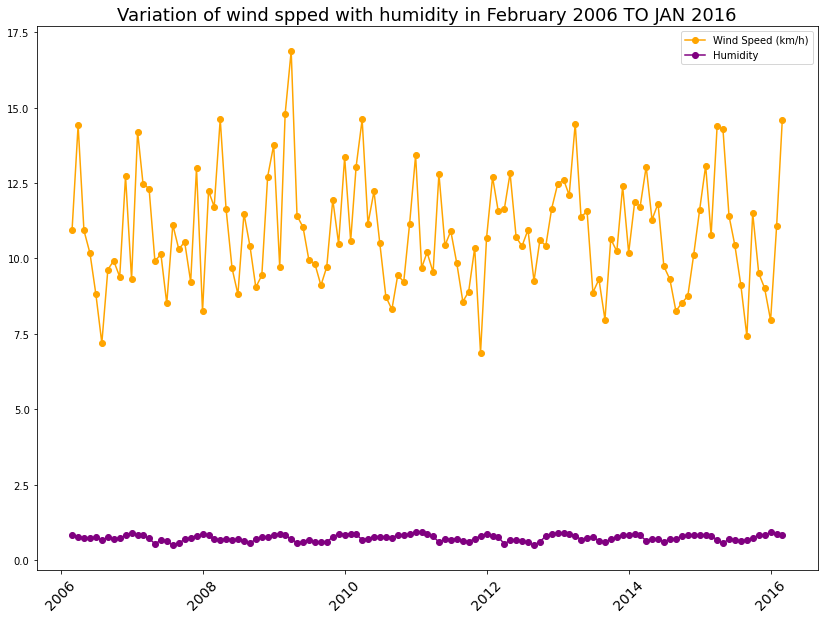

In [30]:

plt.figure(figsize=(14, 10))
plt.plot(df_fwi.loc['2006-02-28':'2016-02-29','Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_fwi.loc['2006-02-28':'2016-02-29','Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in February 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## March

In March month how Apparent Temperature and Humidity how go and related each other.

In [31]:
# In 3th month

df_mar = df2[df2.index.month==3] 
print (df_mar) 
df_mar.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-03-31 00:00:00+00:00                  1.969780  0.778737
2007-03-31 00:00:00+00:00                  7.174619  0.713884
2008-03-31 00:00:00+00:00                  5.004353  0.668468
2009-03-31 00:00:00+00:00                  4.280585  0.696680
2010-03-31 00:00:00+00:00                  4.589038  0.670161
2011-03-31 00:00:00+00:00                  4.589785  0.782970
2012-03-31 00:00:00+00:00                  6.591502  0.535941
2013-03-31 00:00:00+00:00                  1.957445  0.809946
2014-03-31 00:00:00+00:00                  8.408303  0.640403
2015-03-31 00:00:00+00:00                  5.441592  0.669476
2016-03-31 00:00:00+00:00                  5.901404  0.764677


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

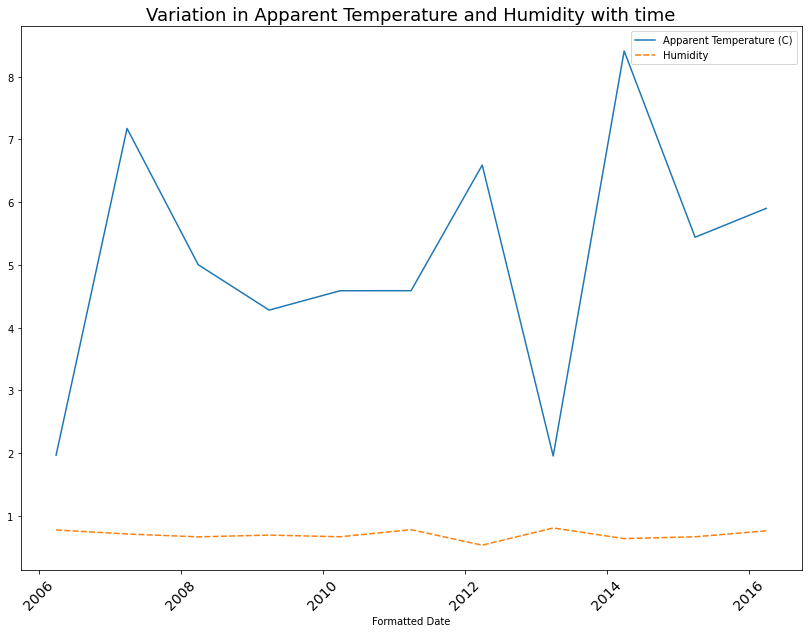

In [32]:
plt.figure (figsize=(14, 10))

plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
sns. lineplot (data=df_mar)
plt.show()

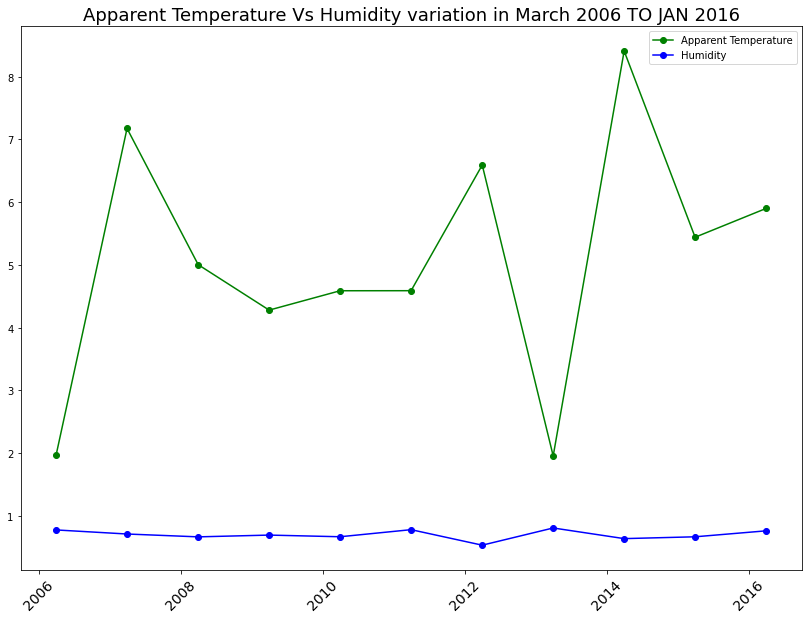

In [33]:
plt.figure(figsize=(14, 10))
plt.plot(df_mar.loc['2006-03-31':'2016-03-31', 'Apparent Temperature (C)'],
        marker='o', label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_mar.loc['2006-03-31':'2016-03-31', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in March 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

March month Wind spped with humidity with time data resampling

In [34]:
df_Mw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Mwi = df_Mw.resample('M').mean()

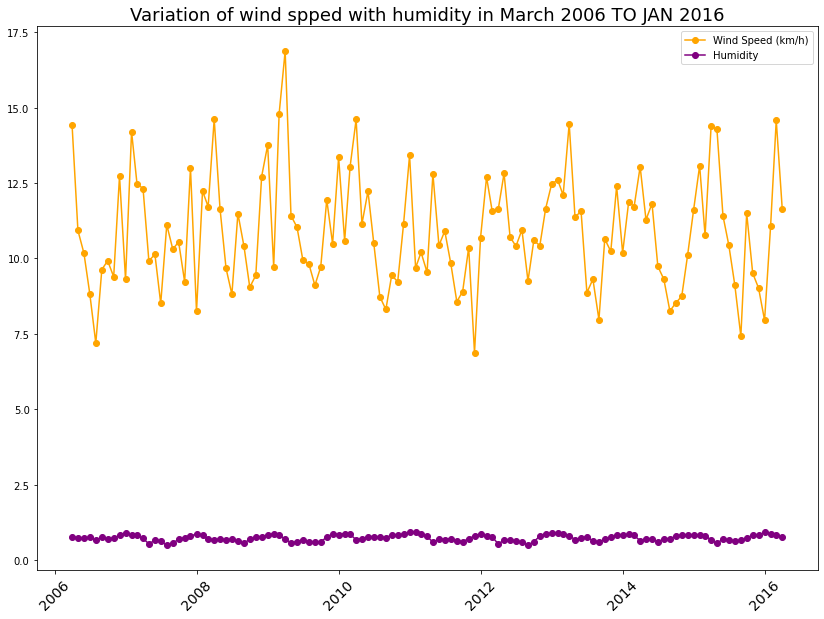

In [35]:
plt.figure(figsize=(14, 10))
plt.plot(df_Mwi.loc['2006-03-31':'2016-03-31', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Mwi.loc['2006-03-31':'2016-03-31', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in March 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## April

In April month how Apparent Temperature and Humidity how go and related each other.

In [36]:
# In 4th month

df_apr = df2[df2.index.month==4] 
print (df_apr) 
df_apr.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-30 00:00:00+00:00                 12.098827  0.728625
2007-04-30 00:00:00+00:00                 11.894421  0.536361
2008-04-30 00:00:00+00:00                 11.183688  0.693194
2009-04-30 00:00:00+00:00                 14.267076  0.567847
2010-04-30 00:00:00+00:00                 11.639406  0.706875
2011-04-30 00:00:00+00:00                 12.978997  0.591625
2012-04-30 00:00:00+00:00                 11.782770  0.650222
2013-04-30 00:00:00+00:00                 12.045563  0.677667
2014-04-30 00:00:00+00:00                 12.486181  0.691403
2015-04-30 00:00:00+00:00                 10.632801  0.547764
2016-04-30 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

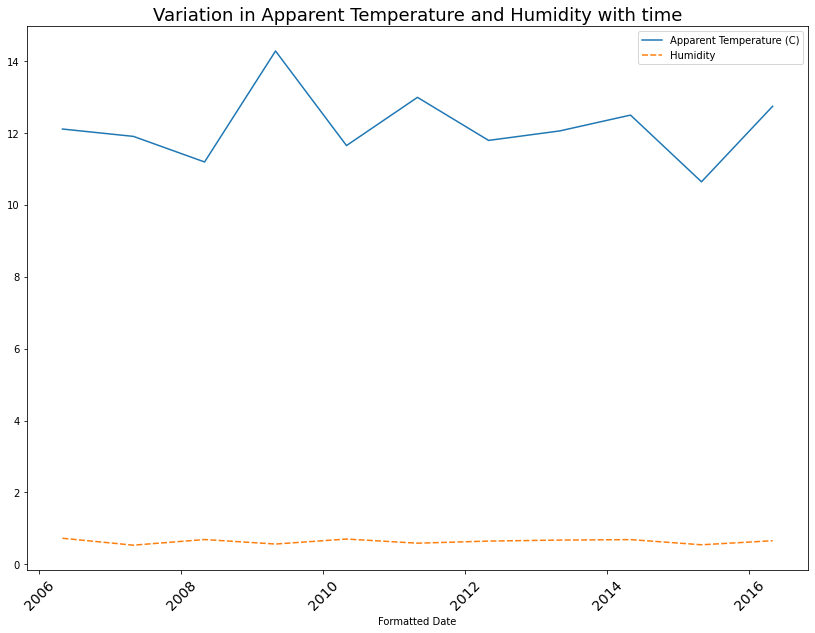

In [37]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_apr)
plt.xticks(rotation=45, fontsize=14)
plt.show()

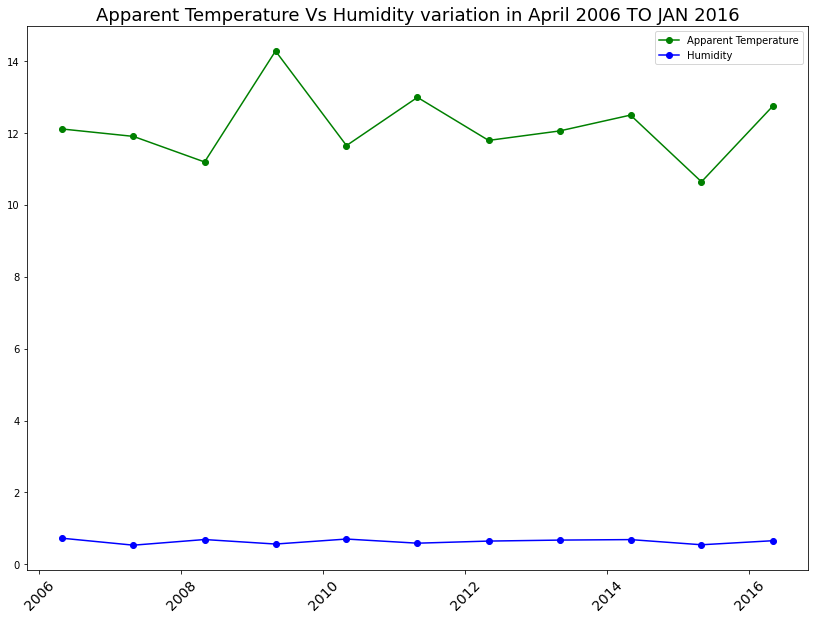

In [38]:
# April
plt.figure(figsize=(14, 10))
plt.plot(df_apr.loc['2006-04-30':'2016-04-30','Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_apr.loc['2006-04-30':'2016-04-30','Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in April 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

April month Wind spped with humidity with time data resampling

In [39]:
df_Aw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Awi = df_Aw.resample('M').mean()

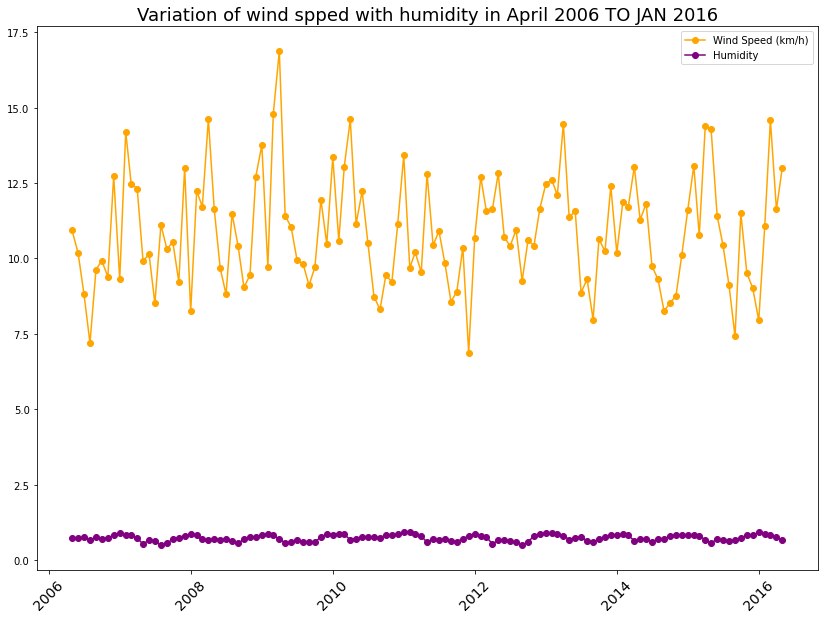

In [40]:
#janw = df2[df2.index.month == 1]

plt.figure(figsize=(14, 10))
plt.plot(df_Awi.loc['2006-04-30':'2016-04-30','Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Awi.loc['2006-04-30':'2016-04-30','Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in April 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## May

In May month how Apparent Temperature and Humidity how go and related each other.

In [41]:
# In 5th month

df_may = df2[df2.index.month==5] 
print (df_may) 
df_may.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-05-31 00:00:00+00:00                 15.539479  0.721801
2007-05-31 00:00:00+00:00                 17.453136  0.653253
2008-05-31 00:00:00+00:00                 17.113583  0.663132
2009-05-31 00:00:00+00:00                 17.691256  0.597151
2010-05-31 00:00:00+00:00                 16.409879  0.773091
2011-05-31 00:00:00+00:00                 16.644922  0.688038
2012-05-31 00:00:00+00:00                 16.985596  0.672863
2013-05-31 00:00:00+00:00                 17.208976  0.735309
2014-05-31 00:00:00+00:00                 15.752218  0.698602
2015-05-31 00:00:00+00:00                 17.067660  0.702742
2016-05-31 00:00:00+00:00                 16.199216  0.702164


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

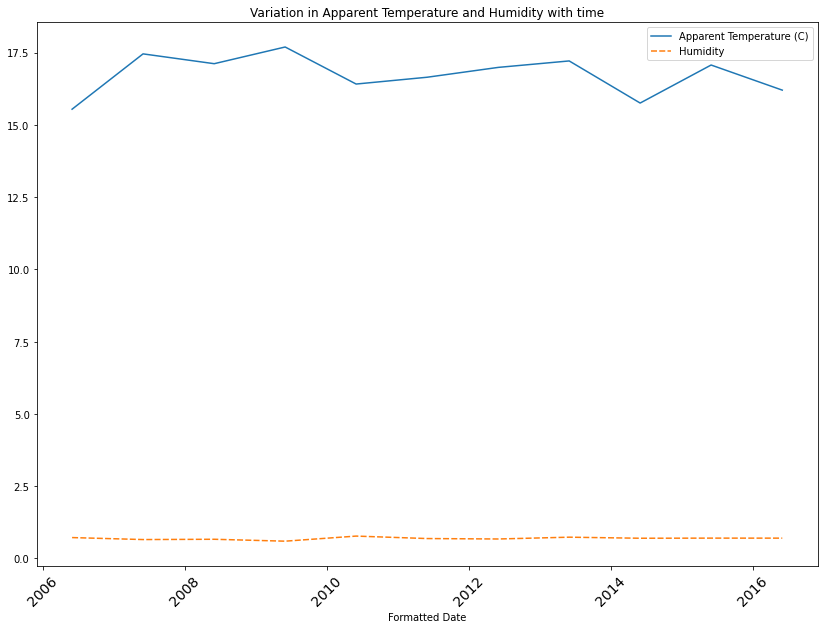

In [42]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time")
sns. lineplot (data=df_may)
plt.xticks(rotation=45, fontsize=14)
plt.show()

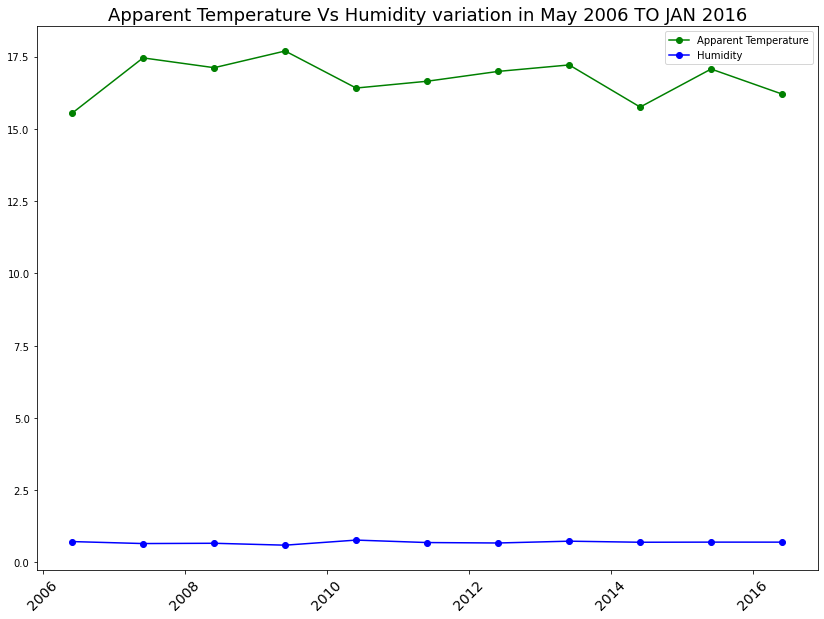

In [43]:

plt.figure(figsize=(14, 10))
plt.plot(df_may.loc['2006-05-31':'2016-05-31', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature", linestyle='-', color="green")
plt.plot(df_may.loc['2006-05-31':'2016-05-31', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in May 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

May month Wind spped with humidity with time data resampling

In [44]:
df_Maw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Mawi = df_Maw.resample('M').mean()

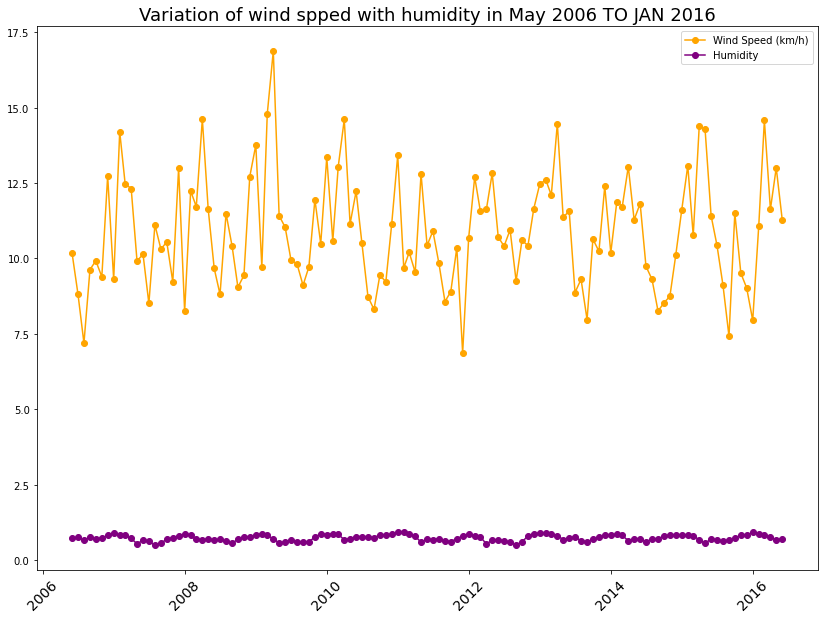

In [45]:

plt.figure(figsize=(14, 10))
plt.plot(df_Mawi.loc['2006-05-31':'2016-05-31', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Mawi.loc['2006-05-31':'2016-05-31', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in May 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## June 

In June month how Apparent Temperature and Humidity how go and related each other.

In [46]:
# In 6th month

df_jun = df2[df2.index.month==6] 
print(df_jun) 
df_jun.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-06-30 00:00:00+00:00                 19.535965  0.747125
2007-06-30 00:00:00+00:00                 21.883102  0.616486
2008-06-30 00:00:00+00:00                 21.513750  0.679861
2009-06-30 00:00:00+00:00                 19.526790  0.675944
2010-06-30 00:00:00+00:00                 20.340571  0.778347
2011-06-30 00:00:00+00:00                 21.157114  0.677611
2012-06-30 00:00:00+00:00                 22.157130  0.622306
2013-06-30 00:00:00+00:00                 20.345664  0.761847
2014-06-30 00:00:00+00:00                 19.874306  0.602403
2015-06-30 00:00:00+00:00                 20.511782  0.655208
2016-06-30 00:00:00+00:00                 21.463387  0.733458


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

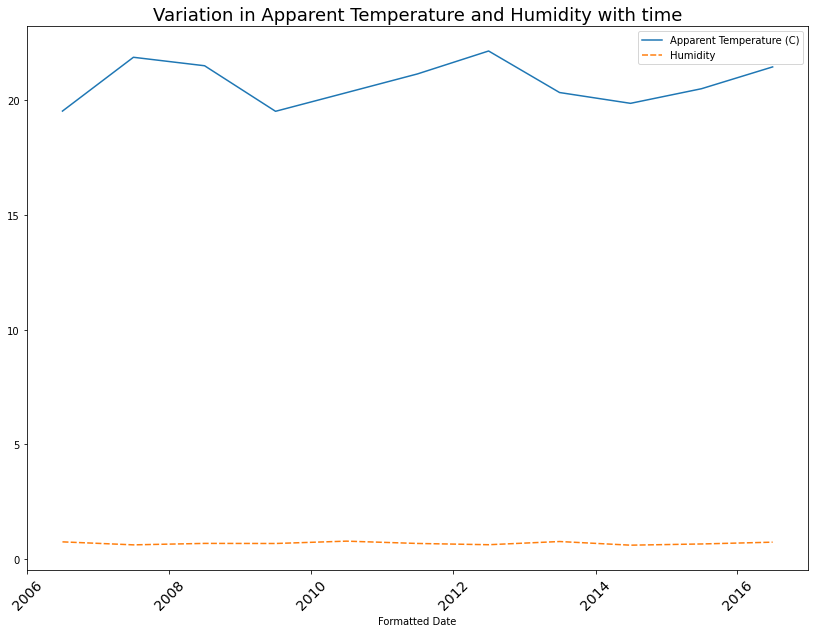

In [47]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_jun)
plt.xticks(rotation=45, fontsize=14)

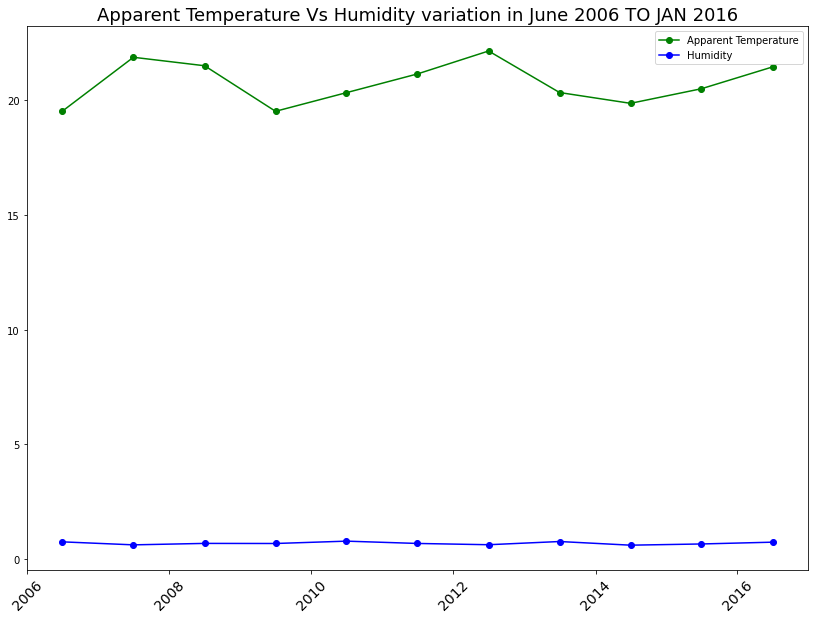

In [48]:

plt.figure(figsize=(14, 10))
plt.plot(df_jun.loc['2006-06-30':'2016-06-30', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_jun.loc['2006-06-30':'2016-06-30', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in June 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

June month Wind spped with humidity with time data resampling

In [49]:
df_Jw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Jwi = df_Jw.resample('M').mean()

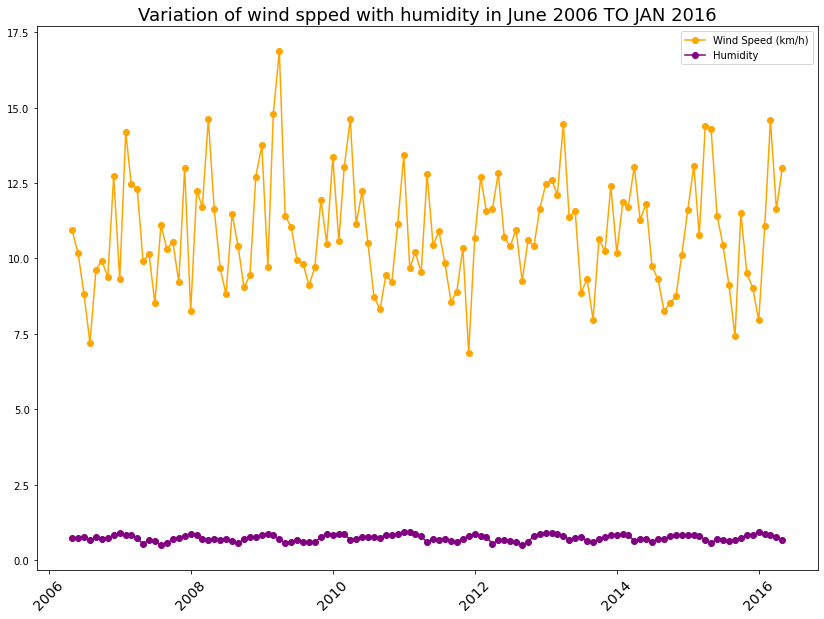

In [50]:

plt.figure(figsize=(14, 10))
plt.plot(df_Jwi.loc['2006-04-30':'2016-04-30','Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Jwi.loc['2006-04-30':'2016-04-30','Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in June 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## July 

In July month how Apparent Temperature and Humidity how go and related each other.

In [51]:
# In 7th month

df_jul = df2[df2.index.month==7] 
print(df_jul) 
df_jul.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-07-31 00:00:00+00:00                 23.595348  0.656304
2007-07-31 00:00:00+00:00                 23.348081  0.491250
2008-07-31 00:00:00+00:00                 21.765562  0.616022
2009-07-31 00:00:00+00:00                 23.091614  0.600215
2010-07-31 00:00:00+00:00                 23.699447  0.755323
2011-07-31 00:00:00+00:00                 21.634984  0.707500
2012-07-31 00:00:00+00:00                 24.525343  0.580860
2013-07-31 00:00:00+00:00                 22.533669  0.636586
2014-07-31 00:00:00+00:00                 21.911598  0.699393
2015-07-31 00:00:00+00:00                 23.803487  0.622984
2016-07-31 00:00:00+00:00                 22.840226  0.669328


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

(array([13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

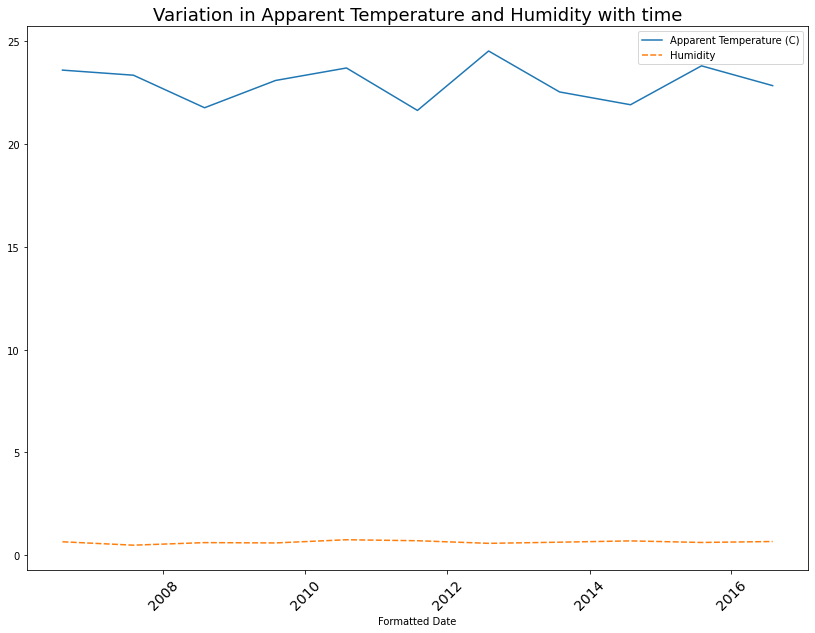

In [52]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_jul)
plt.xticks(rotation=45, fontsize=14)

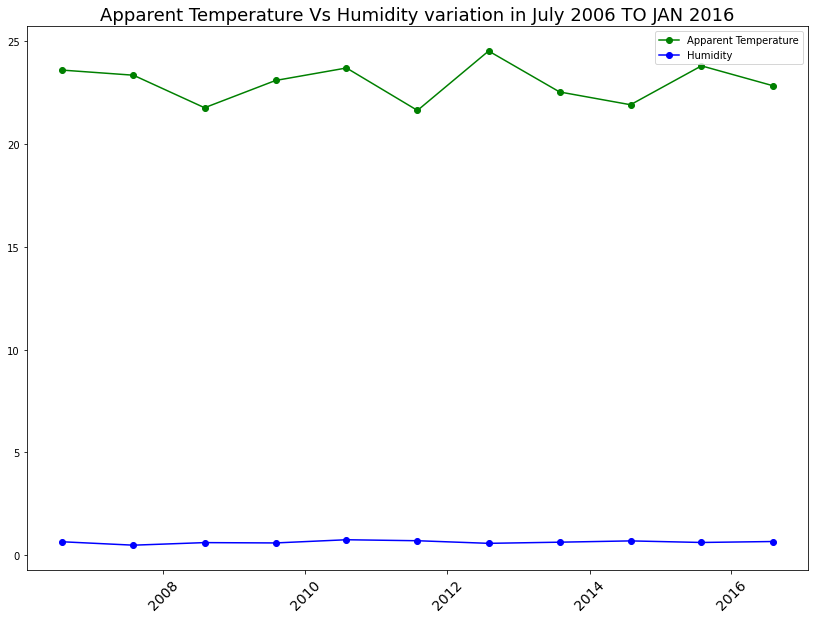

In [53]:

plt.figure(figsize=(14, 10))
plt.plot(df_jul.loc['2006-07-31':'2016-07-31', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_jul.loc['2006-07-31':'2016-07-31', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in July 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

July month Wind spped with humidity with time data resampling

In [54]:
df_Juw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Juwi = df_Juw.resample('M').mean()

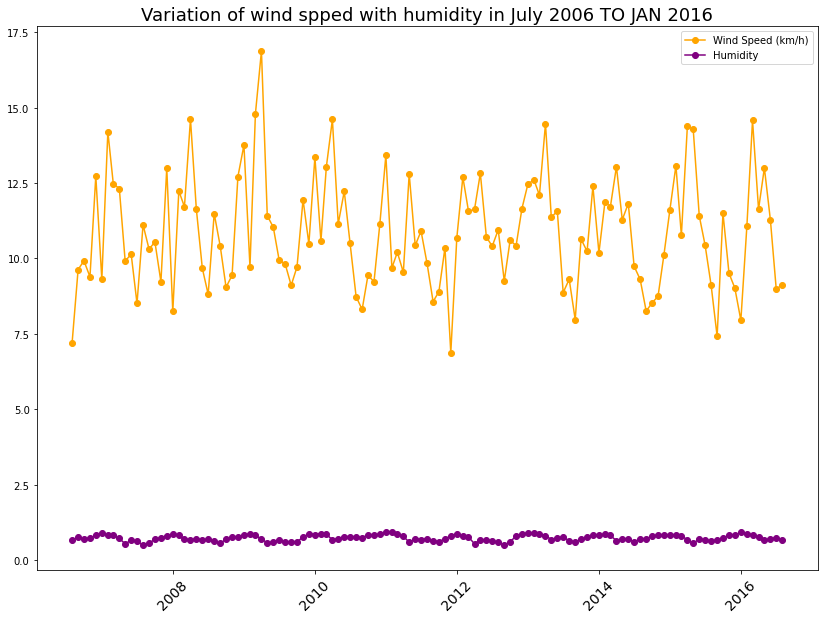

In [55]:

plt.figure(figsize=(14, 10))
plt.plot(df_Juwi.loc['2006-07-31':'2016-07-31','Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Juwi.loc['2006-07-31':'2016-07-31','Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in July 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## August 

In August month how Apparent Temperature and Humidity how go and related each other.

In [56]:
# In 8th month

df_aug = df2[df2.index.month==8] 
print(df_aug) 
df_aug.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-08-31 00:00:00+00:00                 19.528241  0.760753
2007-08-31 00:00:00+00:00                 23.079689  0.562876
2008-08-31 00:00:00+00:00                 22.438852  0.551895
2009-08-31 00:00:00+00:00                 22.794205  0.597231
2010-08-31 00:00:00+00:00                 21.906713  0.742786
2011-08-31 00:00:00+00:00                 22.874126  0.631263
2012-08-31 00:00:00+00:00                 23.384334  0.500081
2013-08-31 00:00:00+00:00                 23.005249  0.596263
2014-08-31 00:00:00+00:00                 20.781870  0.707809
2015-08-31 00:00:00+00:00                 23.745766  0.659825
2016-08-31 00:00:00+00:00                 21.383094  0.674046


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

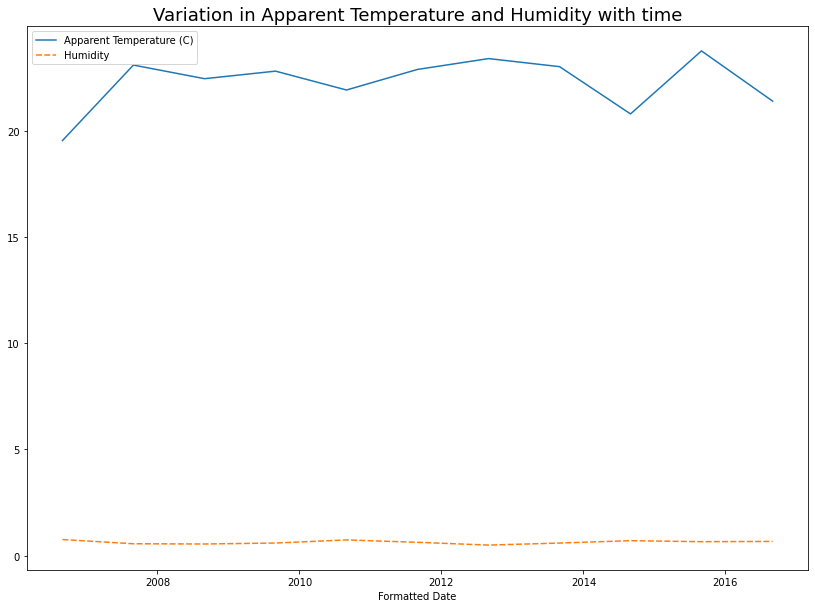

In [57]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_aug)

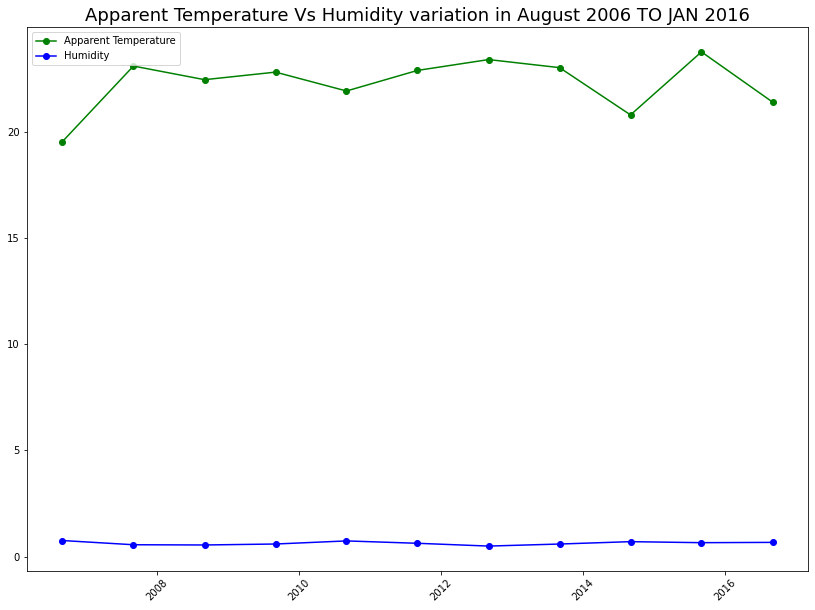

In [58]:

plt.figure(figsize=(14, 10))
plt.plot(df_aug.loc['2006-08-31':'2016-08-31', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_aug.loc['2006-08-31':'2016-08-31', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in August 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

August month Wind spped with humidity with time data resampling

In [59]:
df_Auw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Auwi = df_Auw.resample('M').mean()

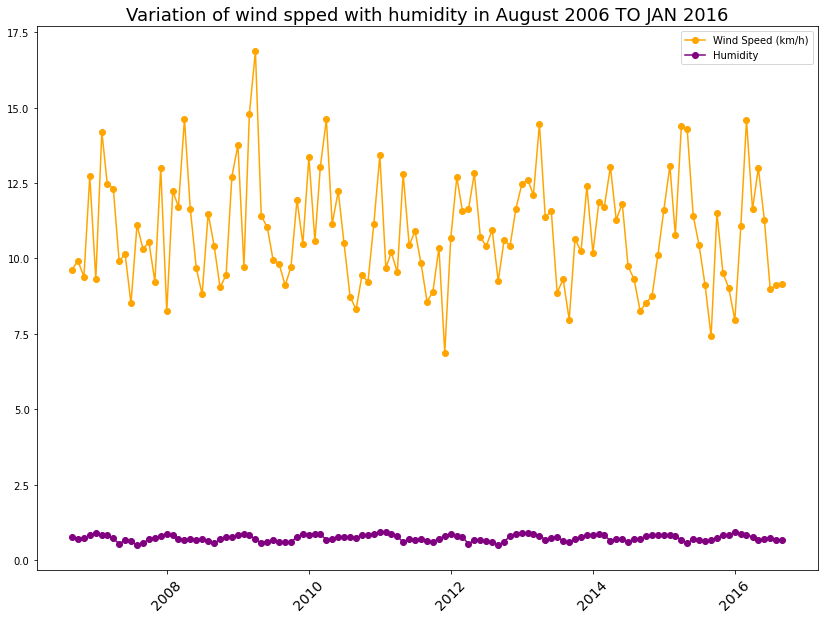

In [60]:

plt.figure(figsize=(14, 10))
plt.plot(df_Auwi.loc['2006-08-31':'2016-08-31','Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Auwi.loc['2006-08-31':'2016-08-31','Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in August 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## September 

In September month how Apparent Temperature and Humidity how go and related each other.

In [61]:
# In 9th month

df_sep = df2[df2.index.month==9] 
print (df_sep) 
df_sep.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-09-30 00:00:00+00:00                 18.155571  0.689444
2007-09-30 00:00:00+00:00                 14.328457  0.682708
2008-09-30 00:00:00+00:00                 15.489606  0.690722
2009-09-30 00:00:00+00:00                 19.322353  0.596764
2010-09-30 00:00:00+00:00                 15.549414  0.826806
2011-09-30 00:00:00+00:00                 19.899900  0.611375
2012-09-30 00:00:00+00:00                 19.302948  0.603319
2013-09-30 00:00:00+00:00                 15.317477  0.691986
2014-09-30 00:00:00+00:00                 17.258387  0.785944
2015-09-30 00:00:00+00:00                 18.308472  0.712889
2016-09-30 00:00:00+00:00                 18.355833  0.688833


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

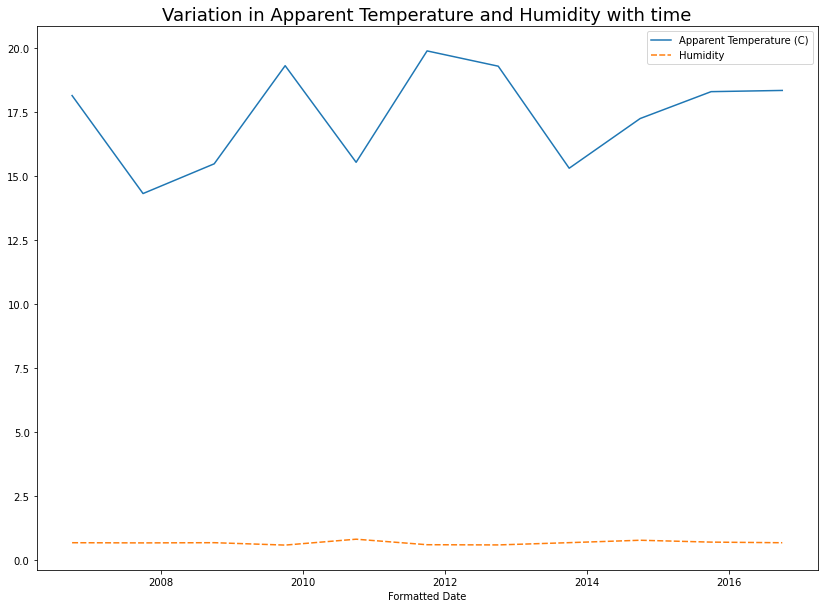

In [62]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_sep)

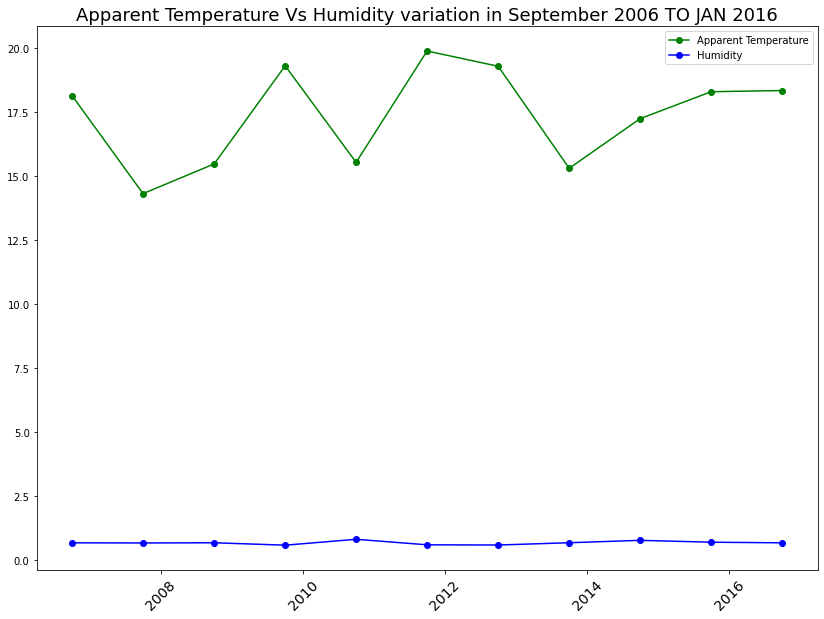

In [63]:
plt.figure(figsize=(14, 10))
plt.plot(df_sep.loc['2006-09-30':'2016-09-30', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature", linestyle='-',color="green")
plt.plot(df_sep.loc['2006-09-30':'2016-09-30','Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in September 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

September month Wind spped with humidity with time data resampling

In [64]:
df_Sew = df[['Wind Speed (km/h)', 'Humidity']] 
df_Sepwi = df_Sew.resample('M').mean()

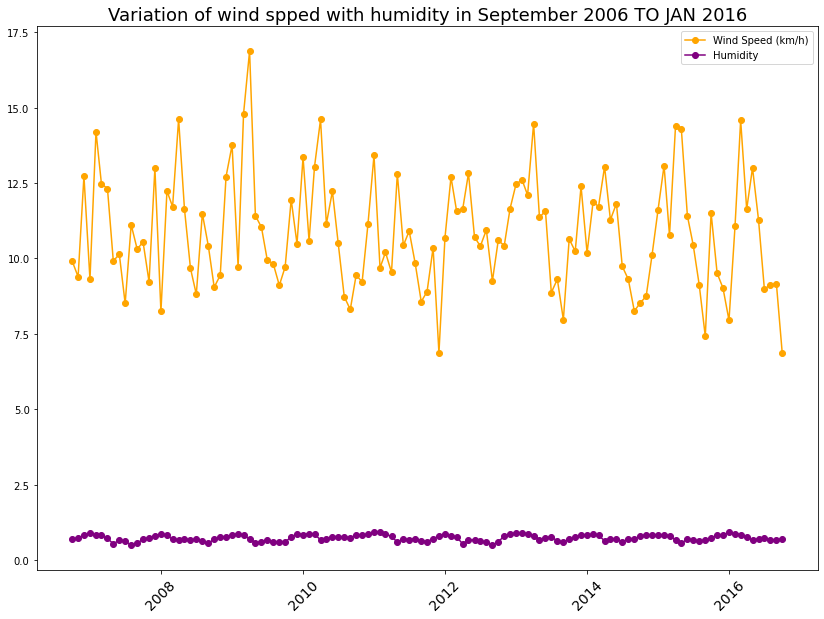

In [65]:
plt.figure(figsize=(14, 10))
plt.plot(df_Sepwi.loc['2006-09-30':'2016-09-30', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Sepwi.loc['2006-09-30':'2016-09-30', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in September 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## October 

In October month how Apparent Temperature and Humidity how go and related each other.

In [66]:
# In 10th month

df_oct = df2[df2.index.month==10] 
print(df_oct) 
df_oct.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-10-31 00:00:00+00:00                 12.398678  0.733642
2007-10-31 00:00:00+00:00                  9.662612  0.740954
2008-10-31 00:00:00+00:00                 12.253390  0.753911
2009-10-31 00:00:00+00:00                 10.433535  0.763468
2010-10-31 00:00:00+00:00                  8.017145  0.815538
2011-10-31 00:00:00+00:00                  9.405167  0.701747
2012-10-31 00:00:00+00:00                 11.435581  0.794315
2013-10-31 00:00:00+00:00                 12.449134  0.748750
2014-10-31 00:00:00+00:00                 12.381803  0.826116
2015-10-31 00:00:00+00:00                 10.170408  0.840524
2016-10-31 00:00:00+00:00                  8.923947  0.799906


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

(array([13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

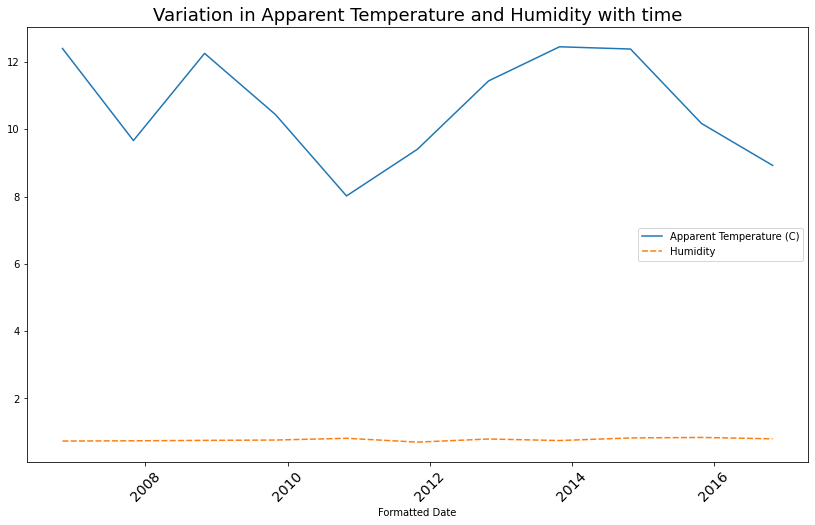

In [67]:
plt.figure (figsize=(14, 8))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_oct)
plt.xticks(rotation=45, fontsize=14)

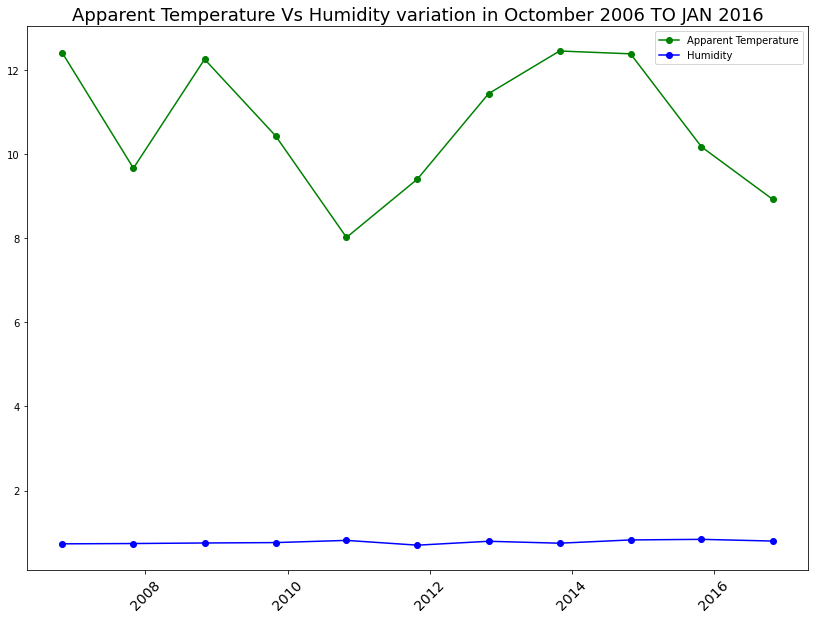

In [68]:
plt.figure(figsize=(14, 10))
plt.plot(df_oct.loc['2006-10-31':'2016-10-31', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_oct.loc['2006-10-31':'2016-10-31', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in Octomber 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

Octomber month Wind spped with humidity with time data resampling

In [69]:
df_Ow = df[['Wind Speed (km/h)', 'Humidity']] 
df_Octwi = df_Ow.resample('M').mean()

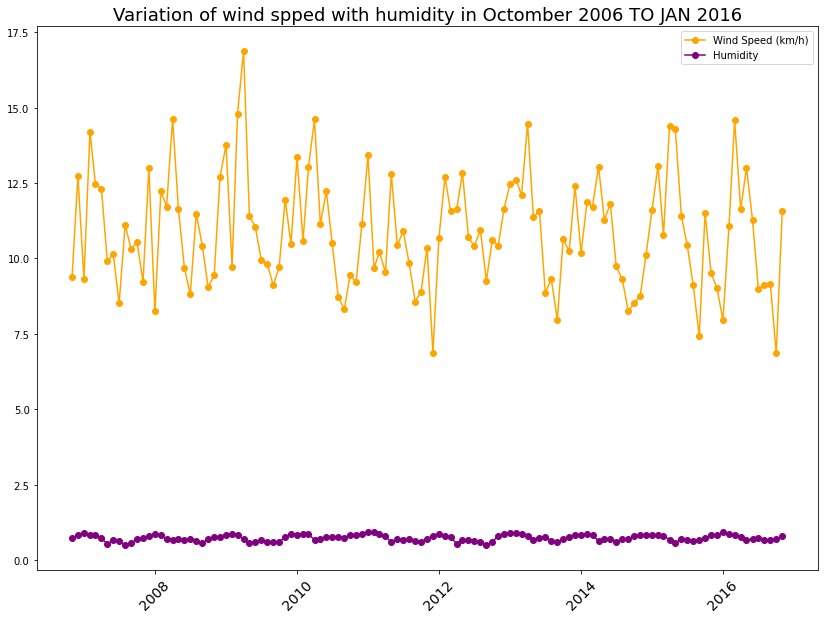

In [70]:
plt.figure(figsize=(14, 10))
plt.plot(df_Octwi.loc['2006-10-31':'2016-10-31', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Octwi.loc['2006-10-31':'2016-10-31', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in Octomber 2006 TO JAN 2016", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(loc="best")
plt.show()

## November

In November month how Apparent Temperature and Humidity how go and related each other.

In [71]:
# In 11th month

df_nov = df2[df2.index.month==11] 
print(df_nov) 
df_nov.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-11-30 00:00:00+00:00                  5.328310  0.812722
2007-11-30 00:00:00+00:00                  1.218225  0.801444
2008-11-30 00:00:00+00:00                  5.415039  0.766972
2009-11-30 00:00:00+00:00                  6.177222  0.865292
2010-11-30 00:00:00+00:00                  7.440934  0.858722
2011-11-30 00:00:00+00:00                  1.368519  0.800528
2012-11-30 00:00:00+00:00                  6.608133  0.871389
2013-11-30 00:00:00+00:00                  6.425664  0.824792
2014-11-30 00:00:00+00:00                  6.639097  0.839736
2015-11-30 00:00:00+00:00                  5.553040  0.817014
2016-11-30 00:00:00+00:00                  3.048627  0.848472


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

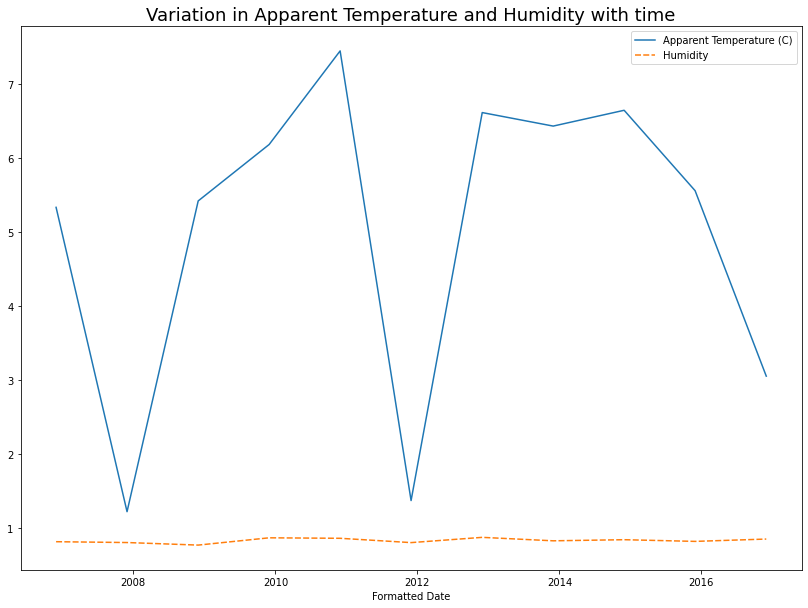

In [72]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_nov)

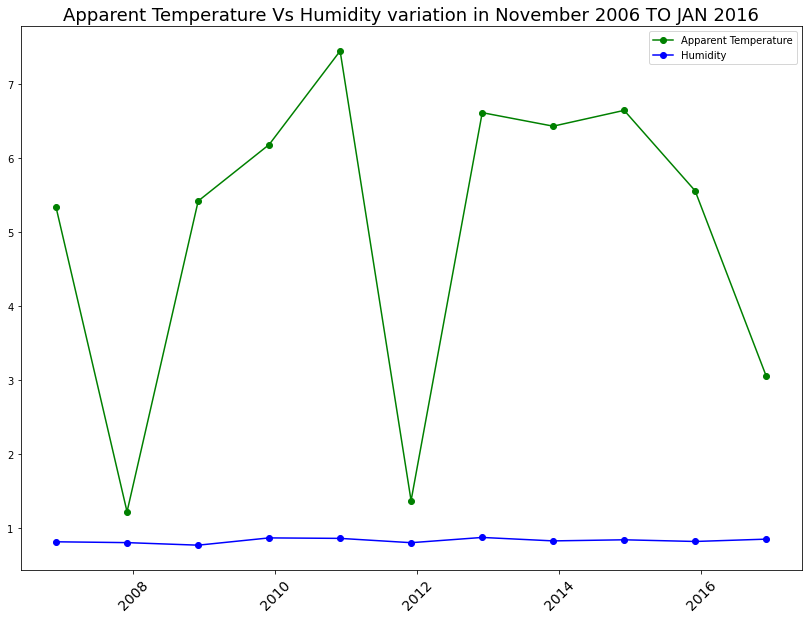

In [73]:
plt.figure(figsize=(14, 10))
plt.plot(df_nov.loc['2006-11-30':'2016-11-30', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_nov.loc['2006-11-30':'2016-11-30', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in November 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

November month Wind spped with humidity with time data resampling

In [74]:
df_Now = df[['Wind Speed (km/h)', 'Humidity']] 
df_Nowi = df_Now.resample('M').mean()

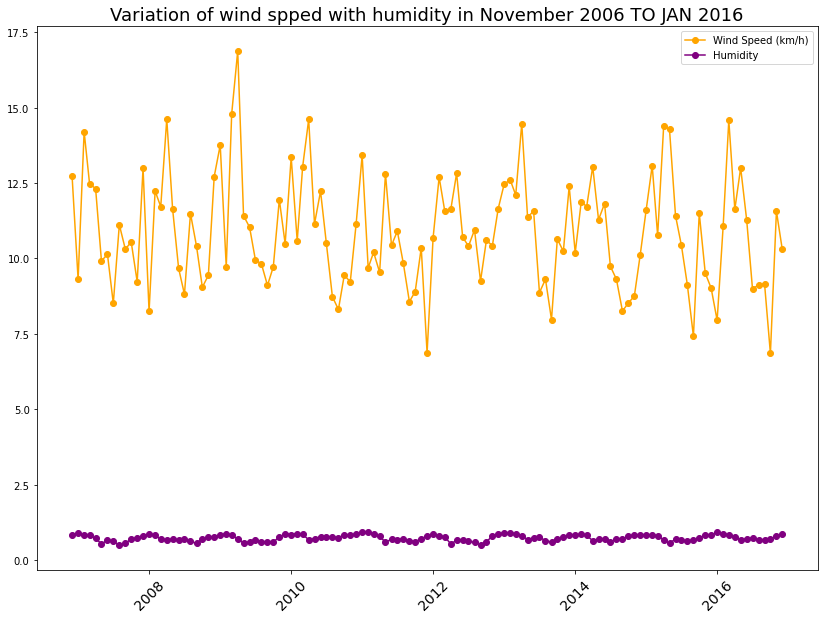

In [75]:
plt.figure(figsize=(14, 10))
plt.plot(df_Nowi.loc['2006-11-30':'2016-11-30', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Nowi.loc['2006-11-30':'2016-11-30', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in November 2006 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

## December

In December month how Apparent Temperature and Humidity how go and related each other.

In [76]:
# In 12th month

df_dec = df2[df2.index.month==12] 
print(df_dec) 
df_dec.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-31 00:00:00+00:00                 -4.050000  0.890000
2006-12-31 00:00:00+00:00                  0.107310  0.905376
2007-12-31 00:00:00+00:00                 -2.964897  0.856250
2008-12-31 00:00:00+00:00                  0.327389  0.828226
2009-12-31 00:00:00+00:00                 -0.169086  0.844637
2010-12-31 00:00:00+00:00                 -3.485947  0.913602
2011-12-31 00:00:00+00:00                  0.618093  0.866223
2012-12-31 00:00:00+00:00                 -3.672909  0.886801
2013-12-31 00:00:00+00:00                 -0.690054  0.823965
2014-12-31 00:00:00+00:00                  0.556586  0.835927
2015-12-31 00:00:00+00:00                  0.828644  0.925390
2016-12-31 00:00:00+00:00                 -2.017272  0.887981


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

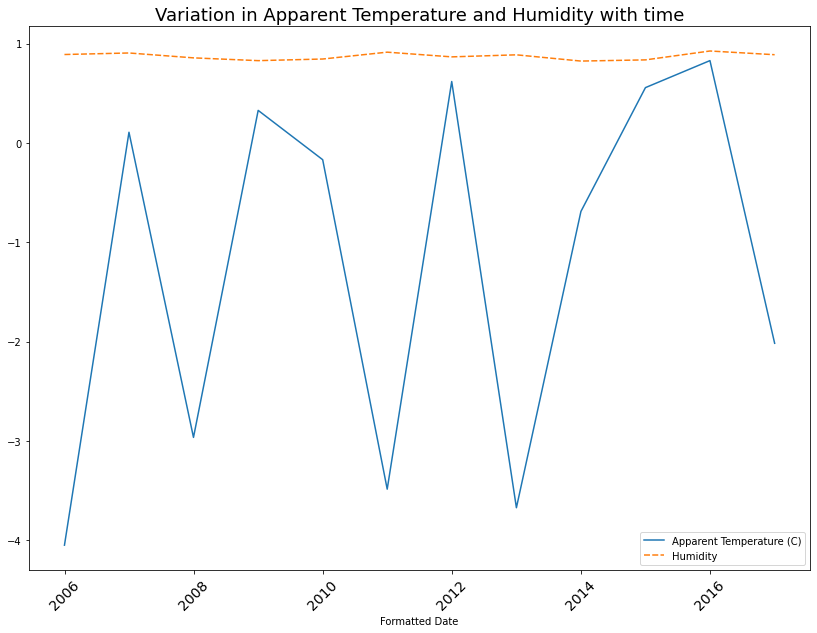

In [77]:
plt.figure (figsize=(14, 10))
plt.title ("Variation in Apparent Temperature and Humidity with time", fontsize=18)
sns. lineplot (data=df_dec)
plt.xticks(rotation=45, fontsize=14)

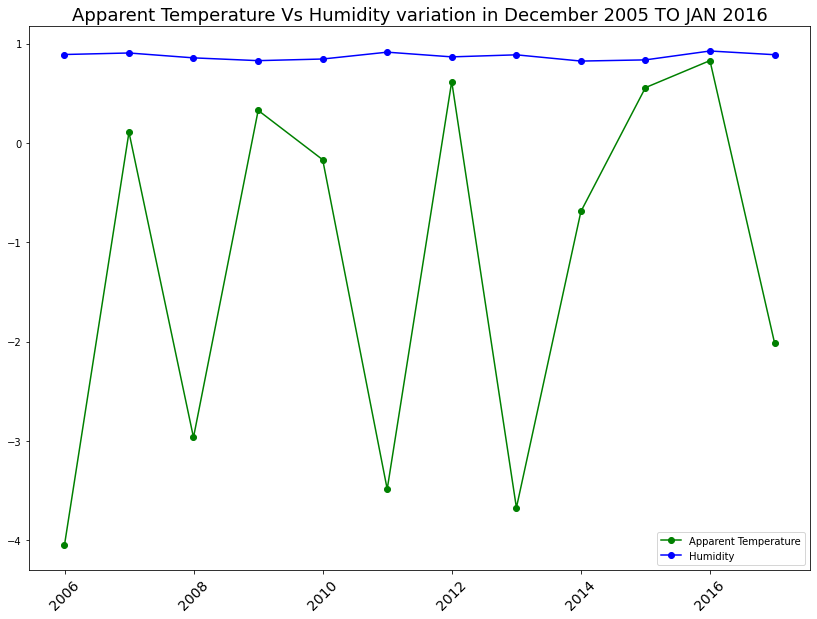

In [78]:
plt.figure(figsize=(14, 10))
plt.plot(df_dec.loc['2005-12-31':'2016-12-31', 'Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(df_dec.loc['2005-12-31':'2016-12-31', 'Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("Apparent Temperature Vs Humidity variation in December 2005 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

December month Wind spped with humidity with time data resampling

In [79]:
df_Dw = df[['Wind Speed (km/h)', 'Humidity']] 
df_Dwi = df_Dw.resample('M').mean()

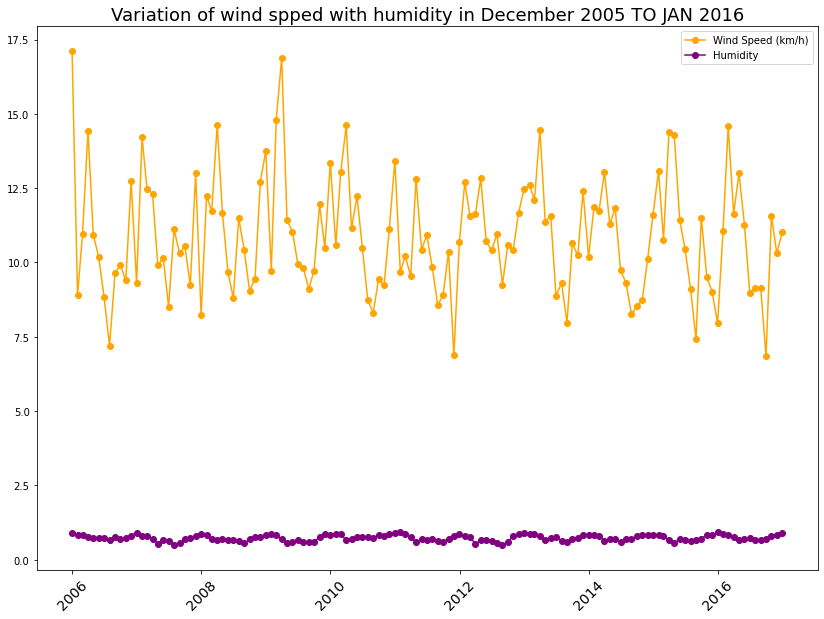

In [80]:
plt.figure(figsize=(14, 10))
plt.plot(df_Dwi.loc['2005-12-31':'2016-12-31', 'Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(df_Dwi.loc['2005-12-31':'2016-12-31', 'Humidity'],
        marker='o',linestyle='-',color="purple", label="Humidity")
plt.title("Variation of wind spped with humidity in December 2005 TO JAN 2016", fontsize=18)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [81]:
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

## Categorical features

In [82]:
categorical_features = ['Summary', 'Precip Type', 'Daily Summary']
print(f"len of categorical features {len(categorical_features)}")

len of categorical features 3


In [83]:
df[categorical_features].head()

,Summary,Precip Type,Daily Summary
Formatted Date,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,Partly cloudy throughout the day.


In [84]:
numerical_features = [ 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
print(f"len of categorical features {len(numerical_features)}")

len of categorical features 7


In [85]:
df[numerical_features].head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [86]:
weather_df = ['Summary',  'Precip Type', 'Temperature (C)', 'Daily Summary']

In [87]:
df[weather_df].head()

,Summary,Precip Type,Temperature (C),Daily Summary
Formatted Date,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,Partly cloudy throughout the day.


## Conclusion

As we can analyze there isn’t any change in humidity in past 11 years(2005–2010) for the month of April. Apparent Temperature (C) and Humidity are month of june, Julay,April, May, August in Apparent Temperature (C) are increashing not go down. In December month Humidity in constanly increashing and lower then Apparent Temperature. Humidity not more related with Wind speed as per our monthly Analysis Wind speed go down and up but Humidity not more effected.

I am thankful to mentors at https://internship.suvenconsultants.com for providing awesome problem statements and giving many of us a Coding Internship Exprience. Thank you www.suvenconsultants.com